### Tensorflow Basics

In [2]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print(tf.__version__)

1.8.0


In [4]:
#### Tensor = N-dimensional array

In [5]:
###Creating a constant

In [6]:
hello = tf.constant("hello ")

In [7]:
world = tf.constant(" world")

In [8]:
with tf.Session() as sess:
    results =sess.run(hello+world)

In [9]:
results

b'hello  world'

In [10]:
#### Adding two tensor

In [11]:
a = tf.constant(5 )
b = tf.constant(6)

In [12]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [13]:
result

11

In [14]:
const = tf.constant(10)

In [15]:
fill_mat = tf.fill((4,4), 10)

In [16]:
my_zeros = tf.zeros((4,4))

In [17]:
myones = tf.ones((4,4))

In [18]:
myrandn = tf.random_normal((4,4), mean = 0, stddev=1.0) #random filling 

In [19]:
myrandu = tf.random_uniform((4,4), minval= 0 , maxval=1) #random uniform distribution

In [20]:
my_ops = [const, fill_mat, my_zeros, myones, myrandn,myrandu] # list of operation

In [21]:
### Interactive session to run a session throgh each cell

In [22]:
sess = tf.InteractiveSession()

In [23]:
for operation in my_ops:
    print(sess.run(operation))
    print(' \n ')

10
 
 
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
 
 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
 
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
 
 
[[ 0.00803341 -2.0251918   1.1697079   0.3905915 ]
 [ 0.6345147  -0.5448288  -1.4323862   0.11520091]
 [-0.2264921   0.53736234 -0.55237985 -0.6426852 ]
 [ 1.0860976  -0.7765769   0.8365793   0.4700108 ]]
 
 
[[0.32633197 0.61508405 0.06401086 0.8268398 ]
 [0.22034705 0.98162556 0.92858136 0.4570831 ]
 [0.99400306 0.92152894 0.19891608 0.6492287 ]
 [0.93740845 0.18722796 0.6125251  0.28937852]]
 
 


In [24]:
# matrix multiplication 

In [25]:
a = tf.constant([[1,2], [3,4]])

In [26]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [27]:
b = tf.constant([[3,3], [3,1]])

In [28]:
op = tf.matmul(a,b)

In [29]:
sess.run(op)

array([[ 9,  5],
       [21, 13]], dtype=int32)

In [30]:
op.eval() # same as sess.run

array([[ 9,  5],
       [21, 13]], dtype=int32)

# TensorFlow Graphs

In [31]:
my_tensor = tf.random_uniform((4,4))

In [32]:
my_var = tf.Variable(my_tensor)

In [33]:
init = tf.global_variables_initializer() #initialise the variable befor running 

In [34]:
sess.run(init)

In [35]:
sess.run(my_var)

array([[0.6713747 , 0.02093911, 0.35931695, 0.5141766 ],
       [0.8629185 , 0.22593546, 0.80751824, 0.6239922 ],
       [0.7057508 , 0.14810443, 0.521     , 0.3108461 ],
       [0.29459107, 0.70998836, 0.73229146, 0.3145913 ]], dtype=float32)

In [36]:
ph  = tf.placeholder(shape = (None,4), dtype=tf.float64)


# 2D regression
wx+b

In [37]:
import numpy as np
import tensorflow as tf

In [38]:
np.random.seed(101)
tf.set_random_seed(101)

In [39]:
rand_a = np.random.uniform(low =0, high =100, size = (5,5))

In [40]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [41]:
rand_b = np.random.uniform(low = 0, high =100, size = (5,1))

In [42]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

### Placeholder

In [43]:
a = tf.placeholder(dtype=tf.float32)

In [44]:
b = tf.placeholder(dtype=tf.float32)

In [45]:
### operation 

In [46]:
add_op = a+b

In [47]:
mul_op = a*b

In [48]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [49]:
with tf.Session() as sess:
    mat_mul = sess.run(mul_op, feed_dict={a: rand_a, b:rand_b})
    print(mat_mul)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Neural Network

In [50]:
n_features = 10 # features in a neuron
n_dense_neurons = 3 # layers in a neuron

In [51]:
# placeholder
x = tf.placeholder(dtype=tf.float32, shape=(None, n_features))


In [52]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones(shape=[n_dense_neurons]))

In [53]:
### operation

xW = tf.matmul(x, W)
z = tf.add(xW, b)

In [54]:
a = tf.nn.sigmoid(z)   #activation

In [55]:
init = tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [57]:
print(layer_out)

[[0.9647503  0.98006964 0.6656347 ]]


In [58]:
#### Linear example

In [59]:
x_data = np.linspace(start=0, stop =20, num= 20) + np.random.uniform(low = -1.5, high =1.5, size =20)
x_data

array([-1.20856056, -0.13882594,  2.70978504,  4.32933434,  3.18920722,
        4.58987553,  6.83326406,  6.36133042,  9.02516604,  9.43658988,
       11.06834909, 11.64359195, 11.26176903, 12.85602034, 14.96245737,
       14.65077466, 16.8424554 , 16.80876555, 17.60579362, 19.03483077])

In [60]:
y_data = np.linspace(start =0, stop = 20, num=20) +np.random.uniform(low=-1.5, high=1.5,size= 20)
y_data

array([-0.17289561,  2.18539355,  3.45305554,  3.09239699,  4.09388434,
        5.67502499,  5.78961346,  6.22115533,  7.07435562,  9.88666017,
       11.46311347, 12.08972863, 13.08688206, 13.45791736, 15.20662811,
       14.91695818, 17.32187882, 17.98360704, 19.69292953, 18.78127057])

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

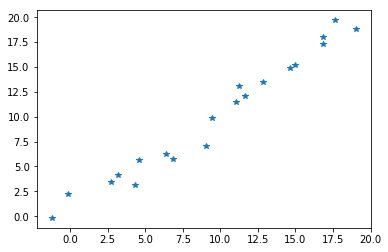

In [62]:
plt.plot(x_data, y_data, '*')

y = mx+b

In [63]:
m = tf.Variable(np.random.rand(1))

In [64]:
b = tf.Variable(np.random.rand(1))

In [65]:
error = 0
for x,y in zip(x_data,y_data):
    y_hat = m*x +b
    
    error += (y- y_hat)**2

In [66]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [67]:
init = tf.global_variables_initializer()

In [68]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps =1000
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept =sess.run([m,b])

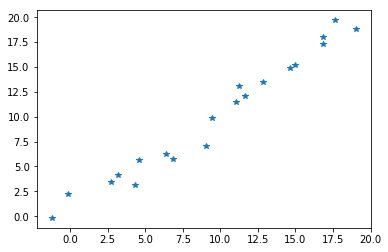

In [71]:
x_test = np.linspace(-1,11,10)

#y = mx+b

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_data, '*')